In [20]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
import numpy as np
from IPython.display import display
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv("AR_cleaned_ISB_aging_new_merge_fi_wgcna.csv")
print(df.shape)
df.head()

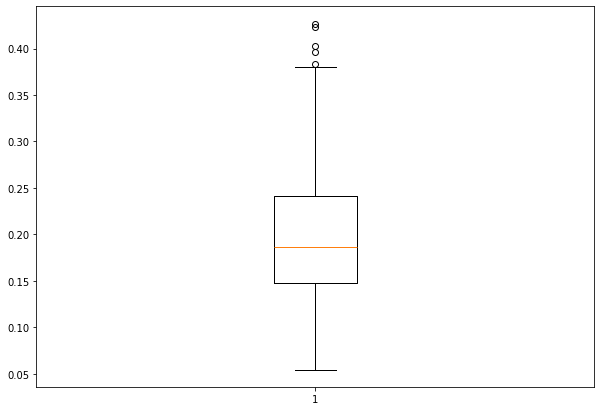

In [14]:
data = df['merge_fi']
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(data)
 
# show plot
plt.show()

In [15]:
cutoff = df['merge_fi'].quantile(0.75)
print(cutoff)

df['merge_fi_class'] = (df['merge_fi'] > cutoff).astype(int)

merge_cats = df['merge_fi_class'].value_counts()
print(merge_cats)

0.241414141
merge_fi_class
0    577
1    192
Name: count, dtype: int64


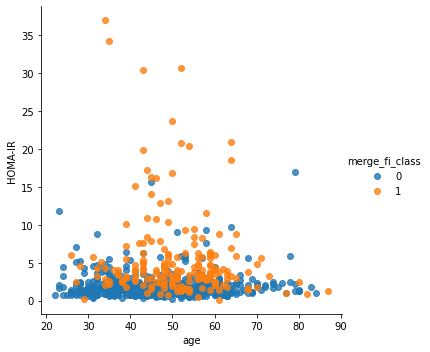

In [16]:
sns.lmplot(x='age',
           y='HOMA-IR',
           hue='merge_fi_class',
           data=df,
           fit_reg=False)
plt.show()

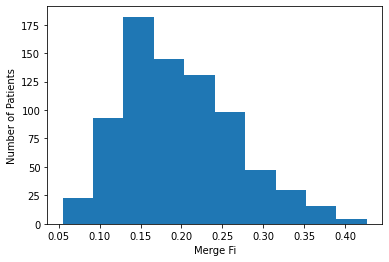

In [17]:
plt.hist(df['merge_fi'])
plt.xlabel('Merge Fi')
plt.ylabel('Number of Patients')
# plt.title('')
plt.grid(False)
plt.show()

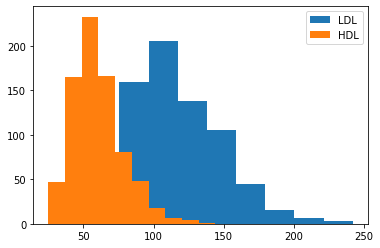

In [18]:
plt.hist(df["LDL-CHOL CALCULATION"].dropna().tolist(), label="LDL")
plt.hist(df["HDL CHOL DIRECT"].dropna().tolist(), label="HDL")
plt.legend()

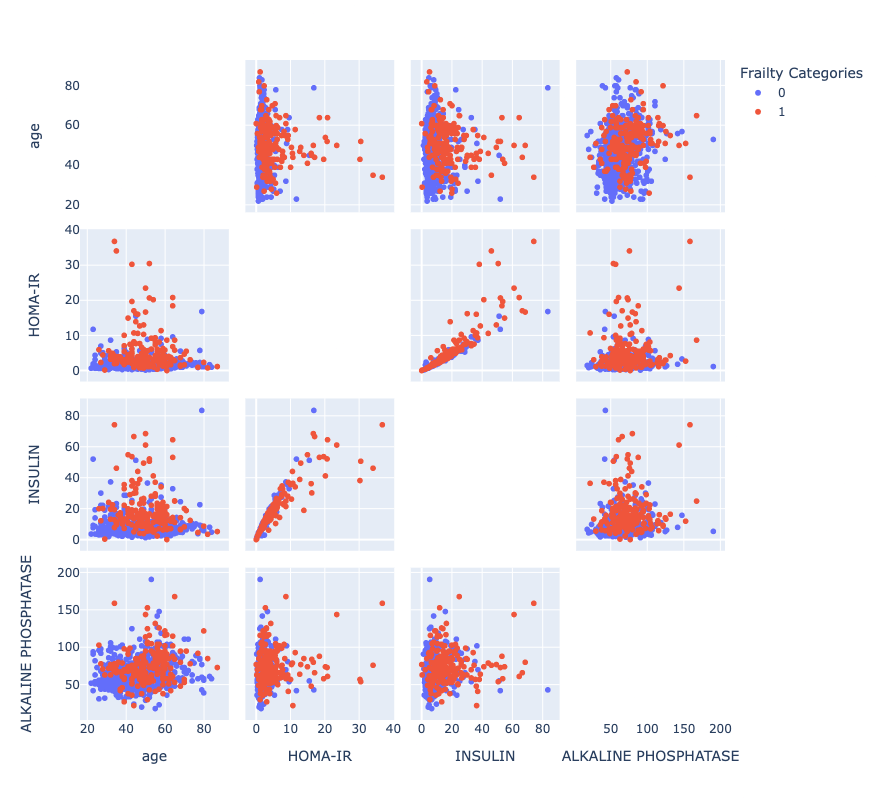

In [31]:
import plotly.express as px

# Define your color mapping for binary classes
color_map = {0: 'blue', 1: 'red'}

fig = px.scatter_matrix(df,
    dimensions=columns,
    color="merge_fi_class", symbol="merge_fi_class",
    color_discrete_map=color_map,
    # title="Scatter matrix of dataset",
    labels={col:col.replace('_', ' ') for col in df.columns})
fig.update_traces(diagonal_visible=False, marker=None)

fig.update_layout(
    autosize=False,
    width=1000, 
    height=800,
    legend_title_text="Frailty Categories"
)

fig.show()